In [1]:
import numpy as np
import pyemma
import ivac
import matplotlib.pyplot as plt
import seaborn as sns
import sys

In [2]:
sys.path.insert(1, "../python/")
sys.path.insert(1, "../../")
import util
import kde

In [3]:
plt.style.use("seaborn-ticks")
sns.set_palette("colorblind")

# Feature 2 (salt bridge) data 

In [4]:
sb_data = np.load("../data/raw_feat/feat2_raw_fix.npy", allow_pickle=True)

In [5]:
print(len(sb_data))
print(sb_data[0].shape)

1237
(3000, 60)


In [6]:
sb_data_arr = np.concatenate(sb_data)
print(sb_data_arr.shape)

(6000000, 60)


In [7]:
sb_data_arr = sb_data_arr[3000000:]
print(sb_data_arr.shape)

(3000000, 60)


## load CVs 

In [8]:
with np.load("../data/raw_feat/cv_dist_spin.npz", allow_pickle=True) as f:
    cv_arr = f["arr_0"]

In [9]:
livac_trajs = np.load("../data/sb-livac.npy", allow_pickle=True)

In [10]:
traj_lens = [len(traj) for traj in livac_trajs]
traj_inds = []
subtot = 0
for length in traj_lens[:-1]:
    subtot += length
    traj_inds.append(subtot)
cv_trajs = np.split(cv_arr, traj_inds)

In [11]:
remove = [
    1282,
    1283,
    1284,
    1285,
    1286,
    1288,
    1289,
    1290,
    1187,
    1188,
    1189,
    1190,
    1191,
    1197,
    1198,
    1199,
    1203,
    1205,
    1206,
    1207,
    1211,
    1212,
    1213,
    1214,
    1215,
    1225,
    1226,
    1227,
    1228,
    1231,
    1232,
    1233,
    1236,
    1237,
    1238,
    1242,
    1245,
    1246,
    1252,
    1253,
    1260,
    1261,
    1262,
    1263,
    1266,
    1267,
    1268,
    1269,
    1270,
    1271,
    1272,
    1273,
    1274,
    1275,
    1276,
    1277,
    1278,
    1279,
]

In [12]:
# delete duplicates
for idx in sorted(remove, reverse=True):
    del cv_trajs[idx]
cv_arr = np.concatenate(cv_trajs)
cv_arr = cv_arr[3000000:]
print(cv_arr.shape)

(3000000, 2)


# Plot Anton Data 

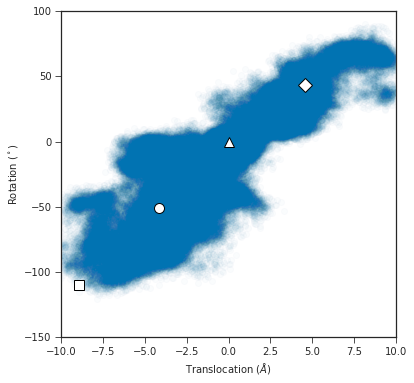

In [17]:
f = plt.figure(figsize=(6, 6))
ax = f.add_subplot(111)
ax.scatter(*cv_arr[::10].T, alpha=0.02)
util.format_cvs(ax)

useful salt bridges:

R223-D129, R223-D186, R226-D129, R226-D186, R229-D129, R229-D186, R232-D129, R232-D186

In [13]:
from itertools import combinations

In [14]:
sb_ids = [42, 48, 47, 53]  # for down to up transition

In [15]:
feat2_models = np.load("../data/models_centroids_feat2.npy")

In [16]:
sb_labels = []
for r in ("R217", "R223", "R226", "R229", "R232"):
    for n in ("D129", "D136", "D151", "D164", "E183", "D186"):
        sb_labels.append(f"{r} - {n}")

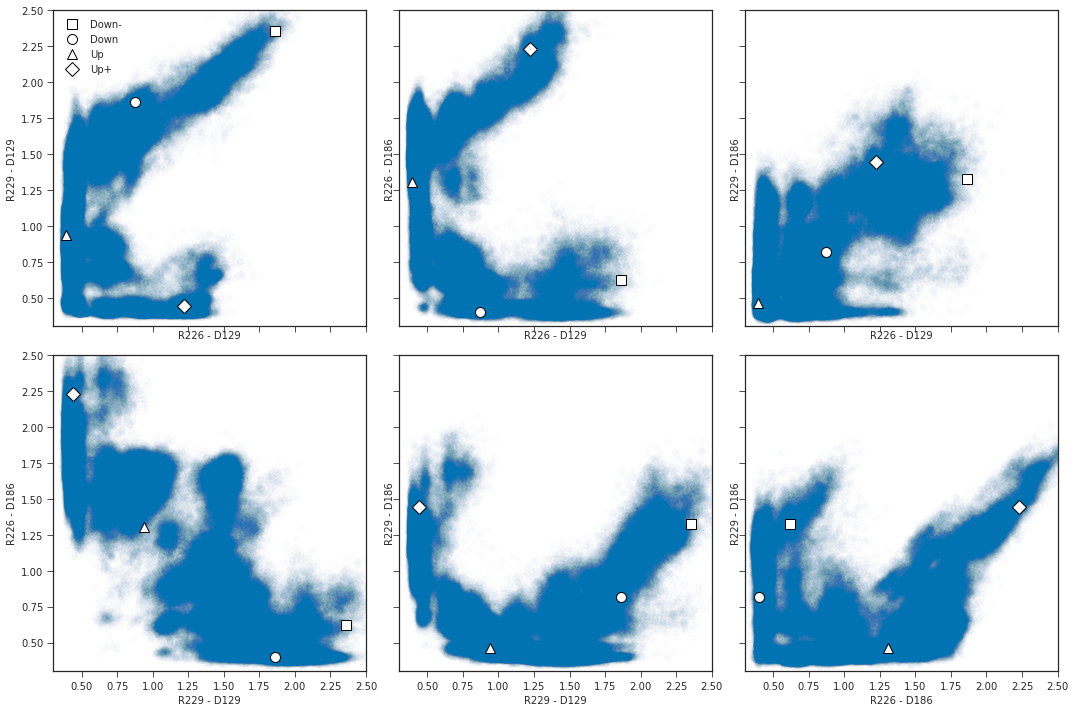

In [23]:
f, axes = plt.subplots(2, 3, figsize=(15, 10), sharex=True, sharey=True)
for ((sb1, sb2), ax) in zip(combinations(sb_ids, 2), axes.flat):
    ax.scatter(sb_data_arr[::10, sb1], sb_data_arr[::10, sb2], alpha=0.01)
    ax.set(xlabel=sb_labels[sb1 - 30], ylabel=sb_labels[sb2 - 30])

axes[0][0].set(xlim=[0.3, 2.5], ylim=[0.3, 2.5])
util.plot_models(axes[0][0], feat2_models[:, 42:49:6])  # indexes 42 and 48
util.plot_models(axes[0][1], feat2_models[:, 42:48:5])  # 42 and 47
util.plot_models(axes[0][2], feat2_models[:, 42:54:11])  # 42 and 53
util.plot_models(axes[1][0], feat2_models[:, 48:46:-1])  # indexes 48 and 47
util.plot_models(axes[1][1], feat2_models[:, 48:54:5])  # 48 and 53
util.plot_models(axes[1][2], feat2_models[:, 47:54:6])  # 47 and 53
axes[0][0].legend(["Down-", "Down", "Up", "Up+"])
f.tight_layout()

In [17]:
# salt bridges that would be good for down- to down transition (just shifted up by one arginine)
# R223-D129, R226-D129, R223-D186, R226-D186
sb_ids_dd = [36, 42, 41, 47]

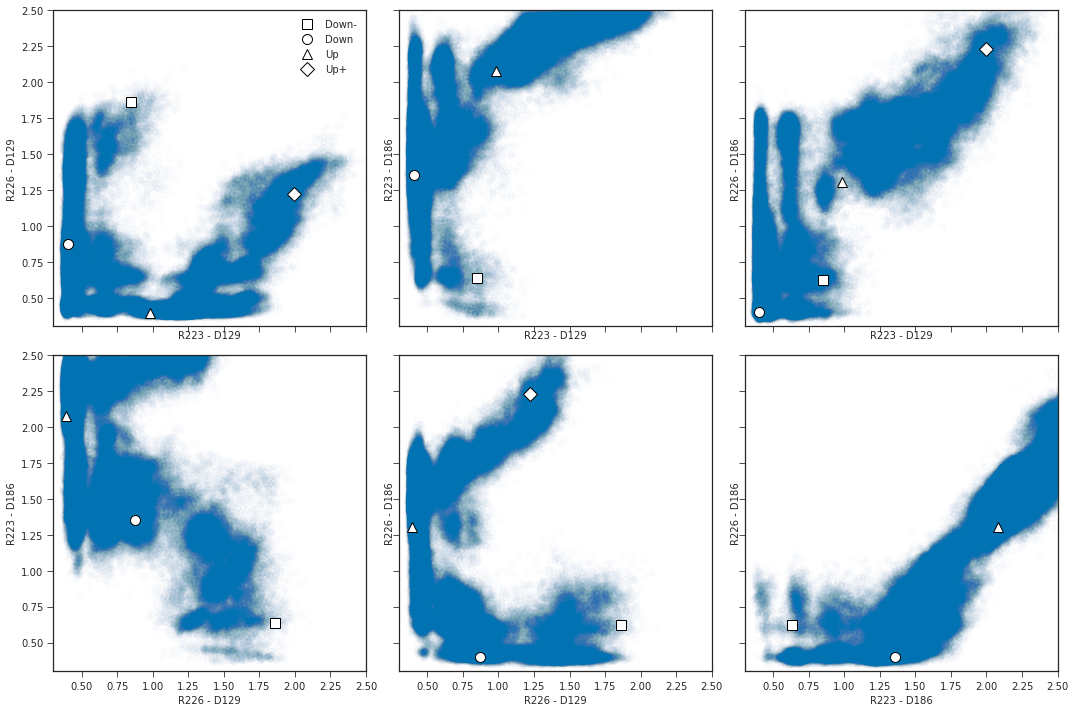

In [25]:
f, axes = plt.subplots(2, 3, figsize=(15, 10), sharex=True, sharey=True)
for ((sb1, sb2), ax) in zip(combinations(sb_ids_dd, 2), axes.flat):
    ax.scatter(sb_data_arr[::10, sb1], sb_data_arr[::10, sb2], alpha=0.01)
    ax.set(xlabel=sb_labels[sb1 - 30], ylabel=sb_labels[sb2 - 30])

axes[0][0].set(xlim=[0.3, 2.5], ylim=[0.3, 2.5])
util.plot_models(axes[0][0], feat2_models[:, 36:43:6])  # indexes 36 and 42
util.plot_models(axes[0][1], feat2_models[:, 36:42:5])  # 36 and 41
util.plot_models(axes[0][2], feat2_models[:, 36:48:11])  # 36 and 47
util.plot_models(axes[1][0], feat2_models[:, 42:40:-1])  # indexes 42 and 41
util.plot_models(axes[1][1], feat2_models[:, 42:48:5])  # 42 and 47
util.plot_models(axes[1][2], feat2_models[:, 41:48:6])  # 41 and 47
axes[0][0].legend(["Down-", "Down", "Up", "Up+"])
f.tight_layout()

In [18]:
# useful salt bridges for up to up+ transition
# R229-D129, R232-D129, R229-D186, R232-D186
sb_ids_uu = [48, 54, 53, 59]

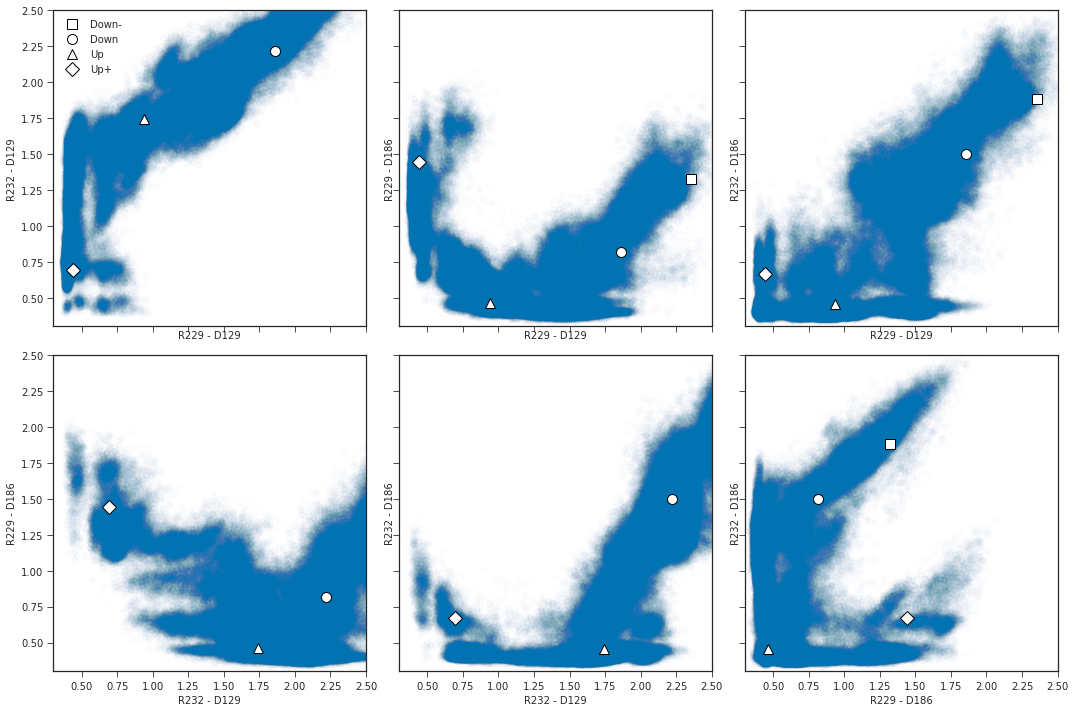

In [27]:
f, axes = plt.subplots(2, 3, figsize=(15, 10), sharex=True, sharey=True)
for ((sb1, sb2), ax) in zip(combinations(sb_ids_uu, 2), axes.flat):
    ax.scatter(sb_data_arr[::10, sb1], sb_data_arr[::10, sb2], alpha=0.01)
    ax.set(xlabel=sb_labels[sb1 - 30], ylabel=sb_labels[sb2 - 30])

axes[0][0].set(xlim=[0.3, 2.5], ylim=[0.3, 2.5])
util.plot_models(axes[0][0], feat2_models[:, 48:55:6])  # indexes 48 and 54
util.plot_models(axes[0][1], feat2_models[:, 48:54:5])  # 48 and 53
util.plot_models(axes[0][2], feat2_models[:, 48:60:11])  # 48 and 59
util.plot_models(axes[1][0], feat2_models[:, 54:52:-1])  # indexes 54 and 53
util.plot_models(axes[1][1], feat2_models[:, 54:60:5])  # 54 and 59
util.plot_models(axes[1][2], feat2_models[:, 53:60:6])  # 53 and 59
axes[0][0].legend(["Down-", "Down", "Up", "Up+"])
f.tight_layout()

# VAMP

In [32]:
vamp_10ns = pyemma.coordinates.vamp(100, dim=10, scaling="km")
vamp_10ns.estimate(sb_data)

TypeError: Argument traj is not a trajectory - only float-arrays or list of float-arrays are allowed. Types is <class 'int'>

# VAC

In [19]:
lags = [1, 5, 10, 20, 50, 100, 200, 500, 1000, 2000, 5000]  # up to 500 ns

In [35]:
scan = ivac.LinearVACScan(
    lags, nevecs=10, addones=True, reweight=False, adjust=True, method="fft-all"
)

In [20]:
sb_data = sb_data[1000:]

In [21]:
len(sb_data)

237

In [41]:
scan.fit(sb_data)

TypeError: batch_compute_c0() got an unexpected keyword argument 'lags'

In [42]:
vac_all = []
for lag in lags:
    vac = ivac.LinearVAC(lag, nevecs=10, addones=True, reweight=False, adjust=True)
    vac.fit(sb_data)
    vac_all.append(vac)

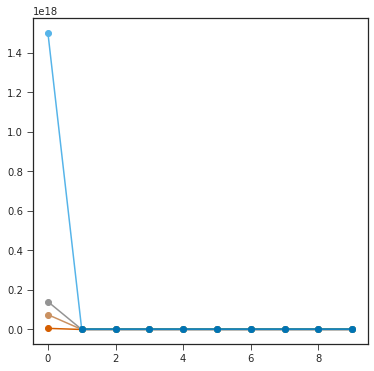

In [46]:
f = plt.figure(figsize=(6, 6))
ax = f.add_subplot(111)
for vac in vac_all:
    ax.plot(vac.its[:10], "-o")
# ax.set_yscale('log')

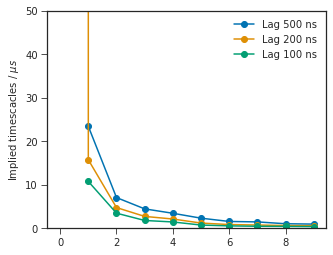

In [54]:
f = plt.figure(figsize=(5, 4))
ax = f.add_subplot(111)
ax.plot(vac_all[-1].its[:10] * 0.0001, "o-")
ax.plot(vac_all[-2].its[:10] * 0.0001, "o-")
ax.plot(vac_all[-3].its[:10] * 0.0001, "o-")
# ax.set_yscale('log')
ax.set_ylim([0, 50])
ax.set_ylabel("Implied timescacles / $\mu s$")
ax.legend(["Lag 500 ns", "Lag 200 ns", "Lag 100 ns"])

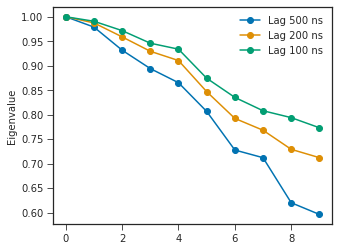

In [55]:
f = plt.figure(figsize=(5, 4))
ax = f.add_subplot(111)
ax.plot(vac_all[-1].evals[:10], "o-")
ax.plot(vac_all[-2].evals[:10], "o-")
ax.plot(vac_all[-3].evals[:10], "o-")
# ax.set_yscale('log')
# ax.set_ylim([0, 50])
ax.set_ylabel("Eigenvalue")
ax.legend(["Lag 500 ns", "Lag 200 ns", "Lag 100 ns"])

## Transformed data 

In [57]:
vac_500ns_trajs = vac_all[-1].transform(sb_data)

In [60]:
vac_500ns_arr = np.concatenate(vac_500ns_trajs)

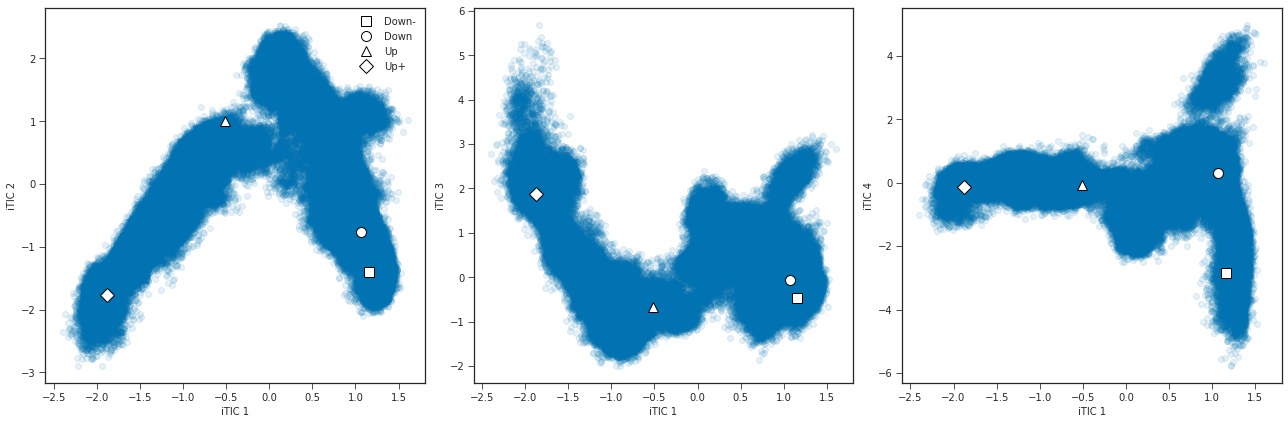

In [64]:
f, axs = plt.subplots(1, 3, figsize=(18, 6))
for i, ax in enumerate(axs):
    h = ax.scatter(vac_500ns_arr[::10, 1], vac_500ns_arr[::10, i + 2], alpha=0.1)
    ax.set_xlabel(f"iTIC {1}")
    ax.set_ylabel(f"iTIC {i + 2}")

util.plot_models(axs[0], models_500ns[:, 1:3])
util.plot_models(axs[1], models_500ns[:, 1:4:2])
util.plot_models(axs[2], models_500ns[:, 1:5:3])
axs[0].legend(["Down-", "Down", "Up", "Up+"])
f.tight_layout()

In [63]:
models_500ns = vac_all[-1].transform([feat2_models])[0]

# IVAC 

In [43]:
ivac = ivac.LinearIVAC(1, 10000, nevecs=10, addones=True, reweight=False, adjust=True)
ivac.fit(sb_data)

Text(0, 0.5, 'Implied timescales / $\\mu s$')

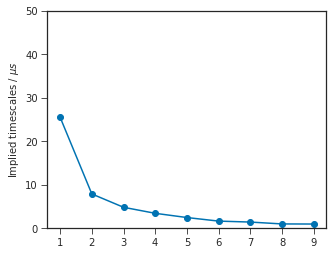

In [56]:
f = plt.figure(figsize=(5, 4))
ax = f.add_subplot(111)
ax.plot(ivac.its[:10] * 0.0001, "o-")
# ax.set_yscale('log')
ax.set_ylim([0, 50])
ax.set_ylabel("Implied timescales / $\mu s$")

In [58]:
ivac_trajs = ivac.transform(sb_data)

In [65]:
ivac_arr = np.concatenate(ivac_trajs)
ivac_models = ivac.transform([feat2_models])[0]

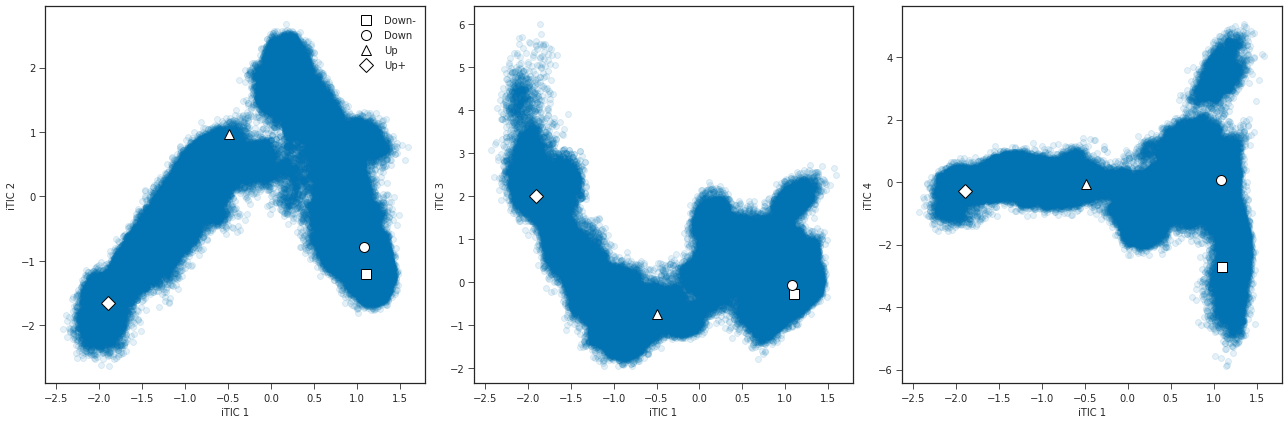

In [66]:
f, axs = plt.subplots(1, 3, figsize=(18, 6))
for i, ax in enumerate(axs):
    h = ax.scatter(ivac_arr[::10, 1], ivac_arr[::10, i + 2], alpha=0.1)
    ax.set_xlabel(f"iTIC {1}")
    ax.set_ylabel(f"iTIC {i + 2}")

util.plot_models(axs[0], ivac_models[:, 1:3])
util.plot_models(axs[1], ivac_models[:, 1:4:2])
util.plot_models(axs[2], ivac_models[:, 1:5:3])
axs[0].legend(["Down-", "Down", "Up", "Up+"])
f.tight_layout()

In [67]:
np.save("../data/feat2_anton_ivac", ivac_trajs)

/project2/roux/scguo/anaconda/envs/py37/lib/python3.7/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


In [69]:
import pickle

In [72]:
with open("../data/livac-feat2-anton.pkl", mode="wb") as f:
    pickle.dump(ivac, f)

In [74]:
# are points sticking out on right of the expanded states
ids = ((ivac_arr[:, 1] - 1.2) ** 2 + (ivac_arr[:, 2] - 1) ** 2).argsort()
print(ids[:10])

[2164823 2183385 2188099 2177940 2172208 2177074 2174626 2164551 2177905
 2173094]


In [79]:
for i, traj in enumerate(ivac_trajs):
    in_d = ((traj[:, 1] > 1.2) & (traj[:, 2] > 1)).nonzero()[0]
    if len(in_d) > 0:
        print(i, in_d)

182 [72590 73157 73540 73542 73735 73969 74805 74939 81086 81132 81143 81153
 81155 81156 81157 81162 81163 81165 81166 81167 81168 81170 81172 81173
 81181 81195 81210 81214 81221 81250 81267 81271 81277 81286 81287 81288
 81310 81312 81315 81683 81734 81791 81792 81793 81795 81891 82022 82063
 82114 82143 82189 82237 82238 82239 82241 82243 82245 82248 82249 82252
 82258 82278 82290 82291 82336 82384 82475 82506 82669 82737 82769 82902
 82918 82920 82922 82927 82942 82980 83027 83032 83040 83086 83093 83124
 83150 83247 83343 83384 83546 83587 83600 83603 83608 83611 83614 83623
 83648 83652 83684 83694 83722 83730 83734 83753 83755 83756 83772 83773
 83786 83791 83798 83800 83806 83813 83830 83882 84228 84348 84411 84421
 84422 84435 84436 84454 84487 84507 84510 84511 84512 84515 84540 84620
 84631 84637 84653 84752 84753 84921 84923 84932 84933 84939 84978 85042
 85070 85076 85080 85088 85089 85093 85094 85095 85098 85100 85108 85113
 85129 85130 85135 85137 85139 85142 85174 8518

In [81]:
# points with ITIC 2 high > 2
for i, traj in enumerate(ivac_trajs):
    in_d = (traj[:, 2] > 2).nonzero()[0]
    if len(in_d) > 100:
        print(i, in_d)

76 [3249 3340 4183 4188 4190 4191 4195 4196 4199 4200 4201 4202 4203 4204
 4207 4208 4210 4213 4214 4220 4223 4224 4225 4226 4227 4228 4229 4230
 4231 4232 4233 4234 4235 4236 4237 4238 4239 4240 4241 4242 4243 4244
 4245 4246 4248 4249 4250 4251 4252 4253 4254 4255 4256 4257 4258 4259
 4260 4261 4263 4264 4265 4268 4279 4294 4296 4310 4320 4322 4330 4331
 4333 4334 4337 4338 4340 4343 4345 4347 4348 4349 4351 4352 4353 4354
 4355 4357 4364 4367 4369 4370 4374 4375 4376 4377 4381 4383 4387 4389
 4390 4397 4404 4405 4411 4412 4415 4416 4423 4424 4439 4489 4531 4654
 4655 5463 5468 5473 5477 5480 5481 5482 5483 5486 5487 5488 5490 5491
 5496 5550 6024]
181 [13183 13186 13195 ... 99997 99998 99999]
191 [1708 1711 1716 1719 1730 1731 1732 1733 1734 1738 1739 2522 2526 2535
 2536 2538 2539 2613 2618 2624 2679 2680 2683 2687 2691 2694 2695 2698
 2699 2701 2702 2703 2704 2708 2713 2715 2716 2717 2718 2719 2720 2722
 2723 2724 2725 2726 2728 2729 2730 2731 2732 2733 2734 2735 2737 2738
 2739 2

In [82]:
# points with ITIC 4 high > 2.5
for i, traj in enumerate(ivac_trajs):
    in_d = (traj[:, 4] > 2.5).nonzero()[0]
    if len(in_d) > 100:
        print(i, in_d)

182 [31928 31929 31931 ... 99997 99998 99999]


# Inverse distances IVAC

In [84]:
import ivac

In [85]:
ivac_inv = ivac.LinearIVAC(
    1, 10000, nevecs=10, addones=True, reweight=False, adjust=True
)
ivac_inv.fit([1 / traj for traj in sb_data])

Text(0, 0.5, 'Implied timescales / $\\mu s$')

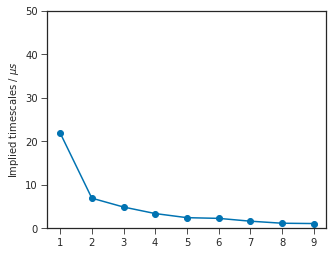

In [86]:
f = plt.figure(figsize=(5, 4))
ax = f.add_subplot(111)
ax.plot(ivac_inv.its[:10] * 0.0001, "o-")
# ax.set_yscale('log')
ax.set_ylim([0, 50])
ax.set_ylabel("Implied timescales / $\mu s$")

In [87]:
ivac_inv_trajs = ivac_inv.transform([1 / traj for traj in sb_data])

In [90]:
ivac_inv_arr = np.concatenate(ivac_inv_trajs)
ivac_inv_models = ivac_inv.transform([1 / feat2_models])[0]

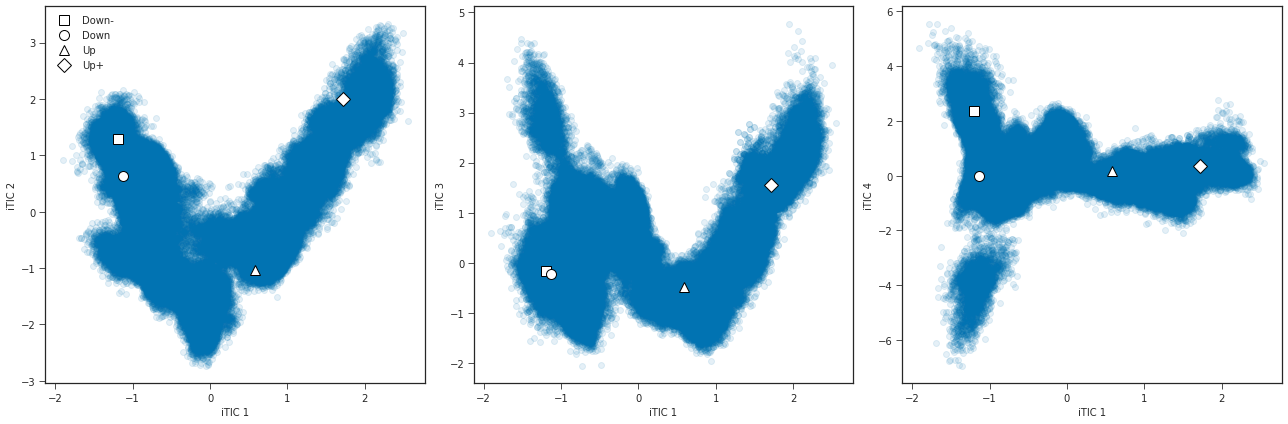

In [91]:
f, axs = plt.subplots(1, 3, figsize=(18, 6))
for i, ax in enumerate(axs):
    h = ax.scatter(ivac_inv_arr[::10, 1], ivac_inv_arr[::10, i + 2], alpha=0.1)
    ax.set_xlabel(f"iTIC {1}")
    ax.set_ylabel(f"iTIC {i + 2}")

util.plot_models(axs[0], ivac_inv_models[:, 1:3])
util.plot_models(axs[1], ivac_inv_models[:, 1:4:2])
util.plot_models(axs[2], ivac_inv_models[:, 1:5:3])
axs[0].legend(["Down-", "Down", "Up", "Up+"])
f.tight_layout()

Interesting how close the down and down- states are, though perhaps a reflection of lack of sampling near down- state

# Indicator functions (MSM)

In [28]:
km = pyemma.coordinates.cluster_mini_batch_kmeans(data=sb_data_arr, k=200, n_jobs=38)

15-06-21 10:49:29 pyemma.coordinates.clustering.kmeans.MiniBatchKmeansClustering[2] INFO     Algorithm did not reach convergence criterion of 1e-05 in 10 iterations. Consider increasing max_iter.


In [29]:
km.describe()

'[Kmeans, k=200, inp_dim=60]'

In [30]:
data_km_arr = km.dtrajs

In [31]:
data_km_arr[0].shape

(3000000,)

In [32]:
data_km_arr = data_km_arr[0]

In [33]:
# indicator basis
ind_basis = np.zeros((len(sb_data_arr), 200))
for i in range(200):
    ind_basis[data_km_arr == i, i] = 1

In [34]:
np.save("../data/raw_feat/feat2_ind200_anton.npy", data_km_arr)

In [36]:
km.save("../data/kmeans_feat2_200_anton.dat", overwrite=True)

15-06-21 10:58:35 pyemma._base.serialization.h5file INFO     overwriting model "default" in file ../data/kmeans_feat2_200_anton.dat


In [38]:
km.cluster_centers_.shape

(200, 60)

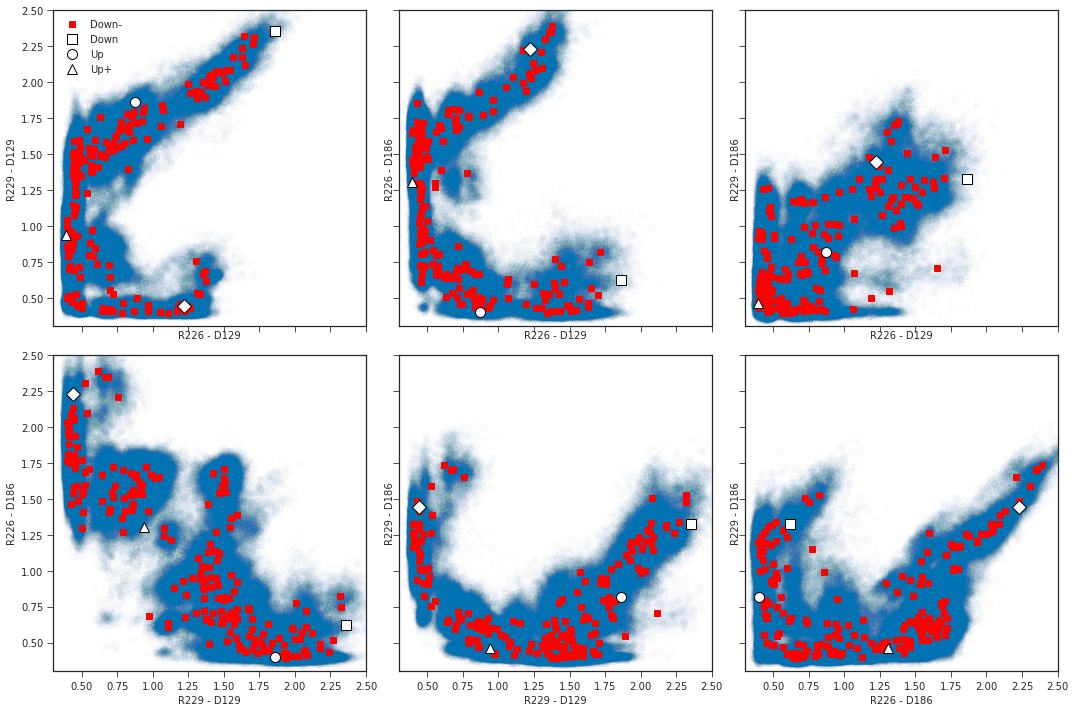

In [39]:
# plot cluster centers
f, axes = plt.subplots(2, 3, figsize=(15, 10), sharex=True, sharey=True)
for ((sb1, sb2), ax) in zip(combinations(sb_ids, 2), axes.flat):
    ax.scatter(sb_data_arr[::10, sb1], sb_data_arr[::10, sb2], alpha=0.01)
    ax.plot(km.cluster_centers_[:, sb1], km.cluster_centers_[:, sb2], "sr")
    ax.set(xlabel=sb_labels[sb1 - 30], ylabel=sb_labels[sb2 - 30])

axes[0][0].set(xlim=[0.3, 2.5], ylim=[0.3, 2.5])
util.plot_models(axes[0][0], feat2_models[:, 42:49:6])  # indexes 42 and 48
util.plot_models(axes[0][1], feat2_models[:, 42:48:5])  # 42 and 47
util.plot_models(axes[0][2], feat2_models[:, 42:54:11])  # 42 and 53
util.plot_models(axes[1][0], feat2_models[:, 48:46:-1])  # indexes 48 and 47
util.plot_models(axes[1][1], feat2_models[:, 48:54:5])  # 48 and 53
util.plot_models(axes[1][2], feat2_models[:, 47:54:6])  # 47 and 53
axes[0][0].legend(["Down-", "Down", "Up", "Up+"])
f.tight_layout()

In [48]:
new_traj_lens = [len(traj) for traj in sb_data]
new_traj_inds = []
subtot = 0
for length in new_traj_lens[:-1]:
    subtot += length
    new_traj_inds.append(subtot)

In [49]:
new_traj_inds[:10]

[10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000]

In [50]:
# IVAC
ind_trajs = np.split(ind_basis, new_traj_inds)
livac_km = ivac.LinearIVAC(
    minlag=1, maxlag=10000, nevecs=5, reweight=False, adjust=True, method="fft"
)
livac_km.fit(ind_trajs)

Text(0, 0.5, 'Implied timescales / $\\mu s$')

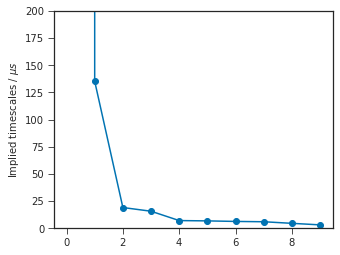

In [53]:
f = plt.figure(figsize=(5, 4))
ax = f.add_subplot(111)
ax.plot(livac_km.its[:10] * 0.0001, "o-")
# ax.set_yscale('log')
ax.set_ylim([0, 200])
ax.set_ylabel("Implied timescales / $\mu s$")

In [55]:
ivac_km_trajs = livac_km.transform(ind_trajs)

In [57]:
ivac_km_arr = np.concatenate(ivac_km_trajs)
models_km = km.assign(feat2_models)
models_ind = np.zeros((4, 200))
for i in range(200):
    models_ind[models_km == i, i] = 1
ivac_km_models = livac_km.transform([models_ind])[0]

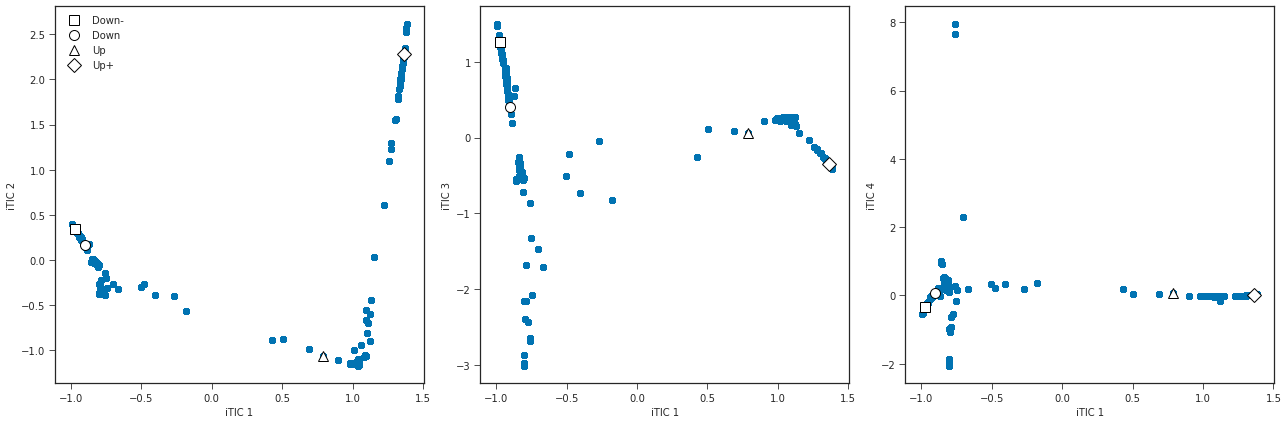

In [58]:
f, axs = plt.subplots(1, 3, figsize=(18, 6))
for i, ax in enumerate(axs):
    h = ax.scatter(ivac_km_arr[::10, 1], ivac_km_arr[::10, i + 2], alpha=0.1)
    ax.set_xlabel(f"iTIC {1}")
    ax.set_ylabel(f"iTIC {i + 2}")

util.plot_models(axs[0], ivac_km_models[:, 1:3])
util.plot_models(axs[1], ivac_km_models[:, 1:4:2])
util.plot_models(axs[2], ivac_km_models[:, 1:5:3])
axs[0].legend(["Down-", "Down", "Up", "Up+"])
f.tight_layout()

## MSM 

In [59]:
its = pyemma.msm.its(data_km_arr, lags, reversible=False, n_jobs=16)

/project2/roux/scguo/anaconda/envs/py37/lib/python3.7/site-packages/msmtools/analysis/dense/decomposition.py:549: ImaginaryEigenValueWarning: Using eigenvalues with non-zero imaginary part
  warnings.warn('Using eigenvalues with non-zero imaginary part', ImaginaryEigenValueWarning)


<AxesSubplot:xlabel='lag time / $\\mu$s', ylabel='timescale / $\\mu$s'>

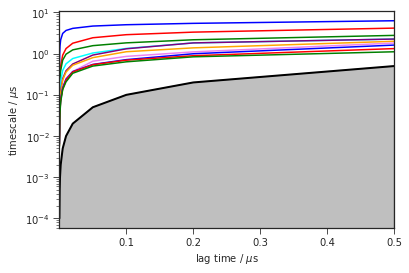

In [65]:
pyemma.plots.plot_implied_timescales(its, nits=10, units="$\mu$s", dt=0.0001)

<AxesSubplot:xlabel='lag time / $\\mu$s', ylabel='timescale / $\\mu$s'>

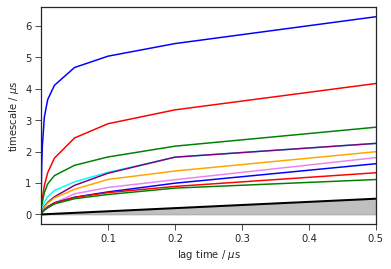

In [64]:
pyemma.plots.plot_implied_timescales(
    its, nits=10, ylog=False, units="$\mu$s", dt=0.0001
)

# Delay embedding

In [22]:
# make delay embedded data (stolen from Erik Thiede's repo)
def delay_embed(tlist, n_embed, lag=1):
    # tlist is list of trajectories
    embed_traj_list = []
    for i, traj_i in enumerate(tlist):
        N_i = len(traj_i)
        if N_i - (lag * n_embed) <= 0:  # Must be longer than max embedding
            continue
        embed_traj_i = []
        for n in range(n_embed + 1):
            start_ndx = lag * (n_embed - n)
            stop_ndx = N_i - (lag * n)
            embed_traj_i.append(traj_i[start_ndx:stop_ndx])
        embed_traj_i = np.concatenate(embed_traj_i, axis=1)
        embed_traj_list.append(embed_traj_i)

    return embed_traj_list

In [23]:
def lift_function(function, n_embed, lag=1):
    lifted_fxn = []
    for i, fxn_i in enumerate(tlist):
        N_i = len(fxn_i)
        if N_i - (lag * n_embed) <= 0:  # Must be longer than max embedding
            continue
        sub_fxn = fxn_i[int(n_embed / 2) : int(N_i - (n_embed / 2))]
        lifted_fxn.append(sub_fxn)
    return lifted_fxn

In [24]:
len(sb_data_embed)

NameError: name 'sb_data_embed' is not defined

In [25]:
import ivac

In [ ]:
embeds = [1, 2, 3, 4]  # number of embeddings
embed_ivac = []
for emb in embeds:
    sb_data_embed = delay_embed(sb_data, emb, lag=1)
    livac = ivac.LinearIVAC(
        1, 10000, nevecs=10, addones=True, reweight=False, adjust=True
    )
    livac.fit(sb_data_embed)
    embed_ivac.append(livac)

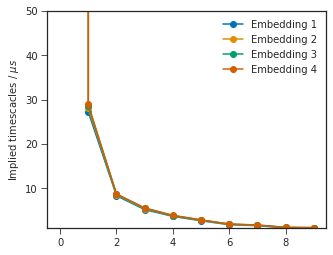

In [90]:
f = plt.figure(figsize=(5, 4))
ax = f.add_subplot(111)
ax.plot(embed_ivac[0].its[:10] * 0.0001, "o-")
ax.plot(embed_ivac[1].its[:10] * 0.0001, "o-")
ax.plot(embed_ivac[2].its[:10] * 0.0001, "o-")
ax.plot(embed_ivac[3].its[:10] * 0.0001, "o-")
# ax.set_yscale('log')
ax.set_ylim([1, 50])
ax.set_ylabel("Implied timescacles / $\mu s$")
ax.legend(["Embedding 1", "Embedding 2", "Embedding 3", "Embedding 4"])

In [84]:
# longer lag embedding
embed_ivac_2 = []
for emb in embeds:
    sb_data_embed = delay_embed(sb_data, emb, lag=2)
    livac = ivac.LinearIVAC(
        1, 10000, nevecs=10, addones=True, reweight=False, adjust=True
    )
    livac.fit(sb_data_embed)
    embed_ivac_2.append(livac)

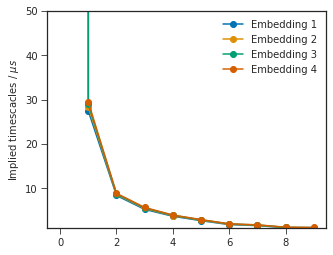

In [86]:
f = plt.figure(figsize=(5, 4))
ax = f.add_subplot(111)
ax.plot(embed_ivac_2[0].its[:10] * 0.0001, "o-")
ax.plot(embed_ivac_2[1].its[:10] * 0.0001, "o-")
ax.plot(embed_ivac_2[2].its[:10] * 0.0001, "o-")
ax.plot(embed_ivac_2[3].its[:10] * 0.0001, "o-")
ax.set_yscale("log")
ax.set_ylim([1, 50])
ax.set_ylabel("Implied timescacles / $\mu s$")
ax.legend(["Embedding 1", "Embedding 2", "Embedding 3", "Embedding 4"])

In [87]:
# even longer lag embedding
embed_ivac_3 = []
for emb in embeds:
    sb_data_embed = delay_embed(sb_data, emb, lag=5)
    livac = ivac.LinearIVAC(
        1, 10000, nevecs=10, addones=True, reweight=False, adjust=True
    )
    livac.fit(sb_data_embed)
    embed_ivac_3.append(livac)

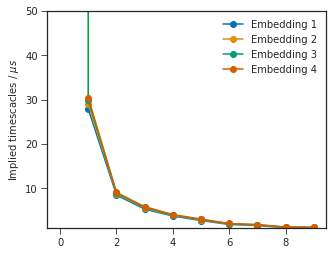

In [89]:
f = plt.figure(figsize=(5, 4))
ax = f.add_subplot(111)
ax.plot(embed_ivac_3[0].its[:10] * 0.0001, "o-")
ax.plot(embed_ivac_3[1].its[:10] * 0.0001, "o-")
ax.plot(embed_ivac_3[2].its[:10] * 0.0001, "o-")
ax.plot(embed_ivac_3[3].its[:10] * 0.0001, "o-")
# ax.set_yscale('log')
ax.set_ylim([1, 50])
ax.set_ylabel("Implied timescacles / $\mu s$")
ax.legend(["Embedding 1", "Embedding 2", "Embedding 3", "Embedding 4"])

## 6.21.21 longer delay 

In [26]:
lags = [10, 50, 100, 500, 1000]
embed_ivac = []
for lag in lags:
    # lag in 0.1 ns
    sb_data_embed = delay_embed(sb_data, 1, lag=lag)
    livac = ivac.LinearIVAC(
        1, 10000, nevecs=10, addones=True, reweight=False, adjust=True
    )
    livac.fit(sb_data_embed)
    embed_ivac.append(livac)

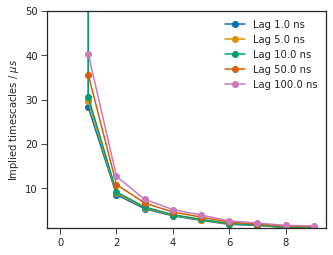

In [27]:
f = plt.figure(figsize=(5, 4))
ax = f.add_subplot(111)
for lag, vac in zip(lags, embed_ivac):
    ax.plot(vac.its[:10] * 0.0001, "-o", label=f"Lag {0.1 * lag} ns")
# ax.set_yscale('log')
ax.set_ylim([1, 50])
ax.set_ylabel("Implied timescacles / $\mu s$")
ax.legend()

In [29]:
# change number of embeddings
delays = [1, 2, 3]
lags = [50, 100, 500]
embed_ivac_long = []
for d in delays:
    # lag in 0.1 ns
    for lag in lags:
        sb_data_embed = delay_embed(sb_data, d, lag=lag)
        livac = ivac.LinearIVAC(
            1, 10000, nevecs=10, addones=True, reweight=False, adjust=True
        )
        livac.fit(sb_data_embed)
        embed_ivac_long.append(livac)

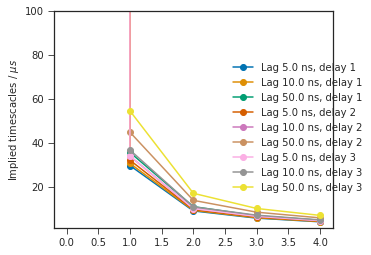

In [34]:
f = plt.figure(figsize=(5, 4))
ax = f.add_subplot(111)
for i, d in enumerate(delays):
    for j, l in enumerate(lags):
        ix = i * 3 + j
        ax.plot(
            embed_ivac_long[ix].its[:5] * 0.0001,
            "-o",
            label=f"Lag {0.1 * l} ns, delay {d}",
        )
# ax.set_yscale('log')
ax.set_ylim([1, 100])
ax.set_ylabel("Implied timescacles / $\mu s$")
f.legend(loc="right")

## MSM 

In [100]:
sb_data_embed = delay_embed(sb_data, embeds[-1], lag=5)
ivac_data_embed_trajs = embed_ivac_3[-1].transform(sb_data_embed)
ivac_data_embed = np.concatenate(ivac_data_embed_trajs)
km = pyemma.coordinates.cluster_mini_batch_kmeans(
    data=ivac_data_embed, k=200, max_iter=100, n_jobs=38
)

16-06-21 13:34:15 pyemma.coordinates.clustering.kmeans.MiniBatchKmeansClustering[9] INFO     Cluster centers converged after 10 steps.


In [101]:
km.describe()

'[Kmeans, k=200, inp_dim=10]'

In [102]:
data_km_arr = km.dtrajs[0]

In [103]:
data_km_arr.shape

(2995260,)

In [107]:
embed_traj_lens = [len(traj) for traj in sb_data_embed]
embed_traj_inds = []
subtot = 0
for length in embed_traj_lens[:-1]:
    subtot += length
    embed_traj_inds.append(subtot)
data_km_trajs = np.split(data_km_arr, embed_traj_inds)

In [111]:
data_km_trajs[0].shape

(9980,)

In [108]:
its_embed = pyemma.msm.its(data_km_trajs, lags, reversible=False, n_jobs=16)

/project2/roux/scguo/anaconda/envs/py37/lib/python3.7/site-packages/msmtools/analysis/dense/decomposition.py:549: ImaginaryEigenValueWarning: Using eigenvalues with non-zero imaginary part
  warnings.warn('Using eigenvalues with non-zero imaginary part', ImaginaryEigenValueWarning)


<AxesSubplot:xlabel='lag time / $\\mu$s', ylabel='timescale / $\\mu$s'>

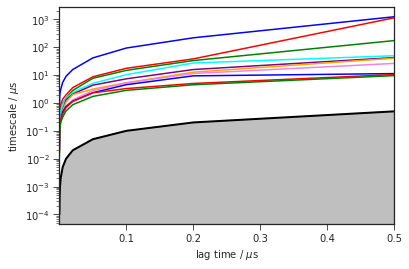

In [109]:
pyemma.plots.plot_implied_timescales(its_embed, nits=10, units="$\mu$s", dt=0.0001)

<AxesSubplot:xlabel='lag time / $\\mu$s', ylabel='timescale / $\\mu$s'>

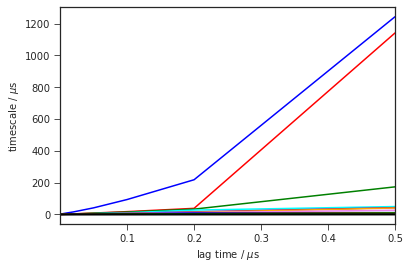

In [110]:
pyemma.plots.plot_implied_timescales(
    its_embed, nits=10, ylog=False, units="$\mu$s", dt=0.0001
)

# qMSM 